In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import shap

In [13]:
X_train = pd.read_csv("./data/X_train.csv", encoding='utf-8')
X_test = pd.read_csv("./data/X_test.csv", encoding='utf-8')
y_train = pd.read_csv("./data/y_train.csv", encoding='utf-8')
y_test = pd.read_csv("./data/y_test.csv", encoding='utf-8')

In [3]:
rf_model = RandomForestRegressor()

In [14]:
param_dist = {
    "n_estimators": [5, 10, 20, 30, 40, 50],
    "max_depth": [2, 5, 15, 20, 25, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4, 10],
    "bootstrap": [True, False]
}

In [15]:
random_search = RandomizedSearchCV(rf_model, param_dist, cv=5, verbose=2, n_jobs=-1, scoring="neg_mean_absolute_error")

In [16]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 5, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [5, 10, 20, 30, 40,
                                                         50]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [17]:
results_random = pd.DataFrame(random_search.cv_results_)
results_random.sort_values(by="rank_test_score", inplace=True)

In [18]:
print(f"Best MAE from random search: {random_search.best_score_}")
print(f"Best params from random search: {random_search.best_params_}")

Best MAE from random search: -0.03024294816359383
Best params from random search: {'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}


In [19]:
grid_search = GridSearchCV(rf_model, param_dist, cv=5, verbose=2, n_jobs=-1, scoring="neg_mean_absolute_error")

In [20]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 5, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [5, 10, 20, 30, 40, 50]},
             scoring='neg_mean_absolute_error', verbose=2)

In [21]:
results_grid = pd.DataFrame(grid_search.cv_results_)
results_grid.sort_values(by="rank_test_score", inplace=True)

In [22]:
print(f"Best MAE from grid search: {grid_search.best_score_}")
print(f"Best params from grid search: {grid_search.best_params_}")

Best MAE from grid search: -0.029579914218819982
Best params from grid search: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 30}


In [23]:
model = RandomForestRegressor(bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=30)

In [25]:
model.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=30)

In [26]:
y_pred = model.predict(X_test)

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.03155805482541499
Mean Squared Error: 0.002286867980177648
R-squared: 0.6590789007654427


In [ ]:
# for residuales, convert df to series
y_test_series = y_test.squeeze()

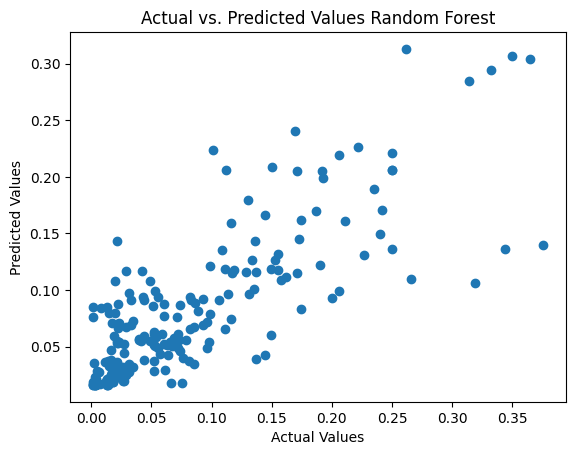

In [43]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Random Forest')
plt.show()

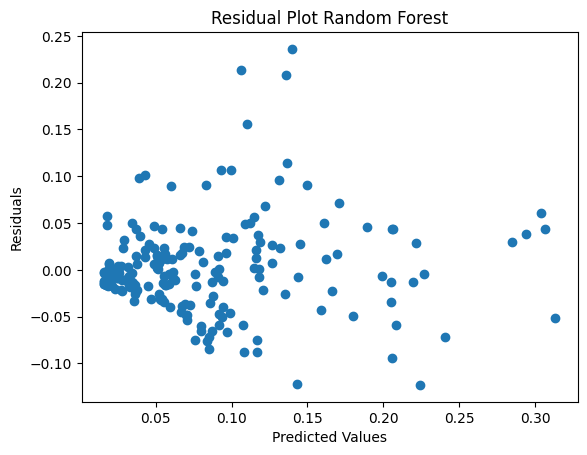

In [45]:
residuals = y_test_series - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot Random Forest')
plt.show()